In [1]:
print("GRACE")

GRACE


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_train=pd.read_csv('training_data.csv')
df_train.head()

,Unnamed: 0,Timestamp,\\DESKTOP-FUOCR3U\Processor(_Total)\% Processor Time,\\DESKTOP-FUOCR3U\Processor(_Total)\% Idle Time,\\DESKTOP-FUOCR3U\Memory\Available MBytes,\\DESKTOP-FUOCR3U\LogicalDisk(_Total)\% Disk Time
0,0,2023-04-28 05:59:48.490,13.959073,52.460838,6768,1.661641
1,1,2023-04-28 06:03:48.490,2.257027,72.309335,6830,0.121271
2,2,2023-04-28 06:07:48.490,4.805736,50.994980,6676,0.412856
3,3,2023-04-28 06:11:48.490,22.811708,40.117944,4861,2.065038
4,4,2023-04-28 06:15:48.490,8.991300,54.365496,4775,0.318020


In [4]:
df_train.isnull().sum()

Unnamed: 0                                              0
Timestamp                                               0
\\DESKTOP-FUOCR3U\Processor(_Total)\% Processor Time    0
\\DESKTOP-FUOCR3U\Processor(_Total)\% Idle Time         0
\\DESKTOP-FUOCR3U\Memory\Available MBytes               0
\\DESKTOP-FUOCR3U\LogicalDisk(_Total)\% Disk Time       0
dtype: int64

In [7]:
df_train.columns[1]

'Timestamp'

In [8]:
df_train = df_train.rename(columns={df_train.columns[2]: 'Processor Time'})
df_train = df_train.rename(columns={df_train.columns[3]: 'Idle Time'})
df_train = df_train.rename(columns={df_train.columns[4]: 'Available'})
df_train = df_train.rename(columns={df_train.columns[5]: 'Disk Time'})


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8911 entries, 0 to 8910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8911 non-null   int64  
 1   Timestamp       8911 non-null   object 
 2   Processor Time  8911 non-null   float64
 3   Idle Time       8911 non-null   float64
 4   Available       8911 non-null   int64  
 5   Disk Time       8911 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 417.8+ KB


In [12]:
df_train.isnull().sum()

Unnamed: 0        0
Timestamp         0
Processor Time    0
Idle Time         0
Available         0
Disk Time         0
dtype: int64

In [13]:
df_train['Timestamp']=pd.to_datetime(df_train['Timestamp'])

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8911 entries, 0 to 8910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      8911 non-null   int64         
 1   Timestamp       8911 non-null   datetime64[ns]
 2   Processor Time  8911 non-null   float64       
 3   Idle Time       8911 non-null   float64       
 4   Available       8911 non-null   int64         
 5   Disk Time       8911 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 417.8 KB


In [15]:
df_train.head()

,Unnamed: 0,Timestamp,Processor Time,Idle Time,Available,Disk Time
0,0,2023-04-28 05:59:48.490,13.959073,52.460838,6768,1.661641
1,1,2023-04-28 06:03:48.490,2.257027,72.309335,6830,0.121271
2,2,2023-04-28 06:07:48.490,4.805736,50.994980,6676,0.412856
3,3,2023-04-28 06:11:48.490,22.811708,40.117944,4861,2.065038
4,4,2023-04-28 06:15:48.490,8.991300,54.365496,4775,0.318020


In [16]:
df_train.set_index('Timestamp',inplace=True)

<AxesSubplot:xlabel='Timestamp'>

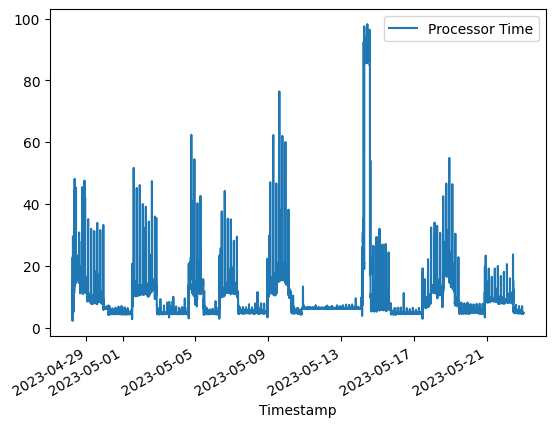

In [17]:
df_train[['Processor Time']].plot()

<AxesSubplot:xlabel='Timestamp'>

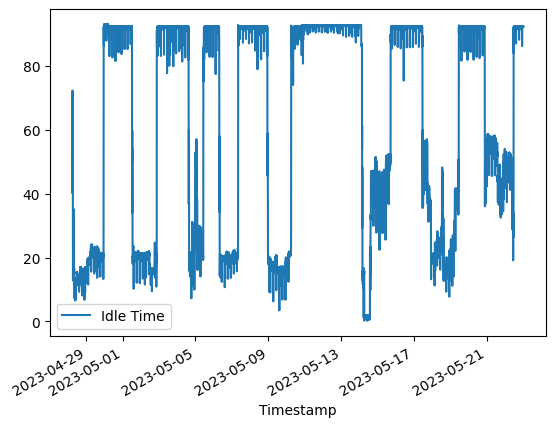

In [18]:
df_train[['Idle Time']].plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
adf_test(df_train['Idle Time'])

ADF Statistics: -4.034283709137057
p- value: 0.0012412570084666627
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

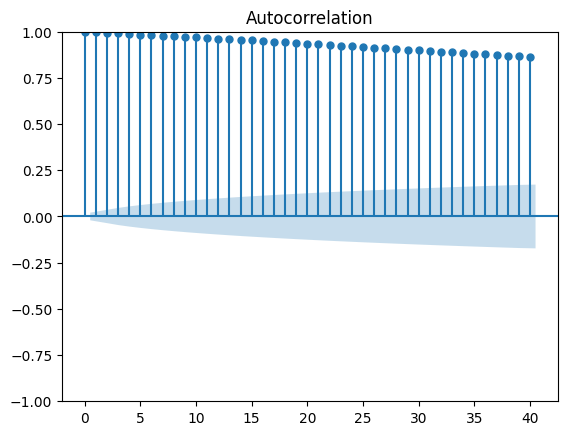

In [24]:
acf = plot_acf(df_train['Idle Time'])

c:\Users\Rajith.A\Anaconda3\envs\sgh-ml-prediction-service\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


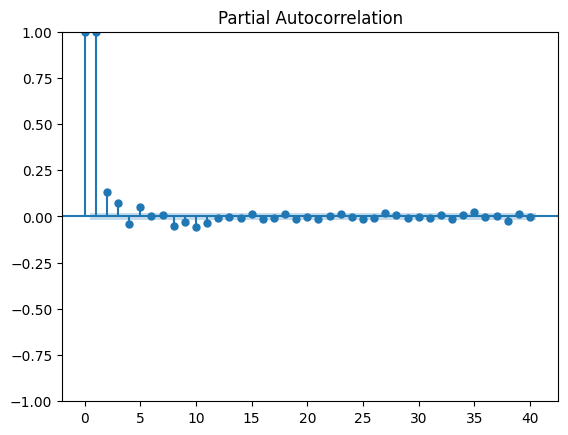

In [25]:
pacf = plot_pacf(df_train['Idle Time'].dropna())

In [27]:
df_train

,Unnamed: 0,Processor Time,Idle Time,Available,Disk Time
Timestamp,,,,,
2023-04-28 05:59:48.490,0,13.959073,52.460838,6768,1.661641
2023-04-28 06:03:48.490,1,2.257027,72.309335,6830,0.121271
2023-04-28 06:07:48.490,2,4.805736,50.994980,6676,0.412856
2023-04-28 06:11:48.490,3,22.811708,40.117944,4861,2.065038
2023-04-28 06:15:48.490,4,8.991300,54.365496,4775,0.318020
...,...,...,...,...,...
2023-05-22 23:43:48.490,8906,4.613605,92.355495,8883,0.032694
2023-05-22 23:47:48.490,8907,4.896507,92.338494,8872,0.032445
2023-05-22 23:51:48.490,8908,4.652055,92.391400,8869,0.020792


In [28]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model_ARIMA=ARIMA(df_train['Idle Time'],order=(12,0,40))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [30]:
import statsmodels.api as sm

# Create an ARIMA model
arima_model = sm.tsa.ARIMA(df_train['Idle Time'], order=(12,0,40))

# Fit the model to the data
arima_result = arima_model.fit()



c:\Users\Rajith.A\Anaconda3\envs\sgh-ml-prediction-service\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 4T will be used.
  self._init_dates(dates, freq)
c:\Users\Rajith.A\Anaconda3\envs\sgh-ml-prediction-service\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 4T will be used.
  self._init_dates(dates, freq)
c:\Users\Rajith.A\Anaconda3\envs\sgh-ml-prediction-service\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 4T will be used.
  self._init_dates(dates, freq)
c:\Users\Rajith.A\Anaconda3\envs\sgh-ml-prediction-service\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [31]:
arima_result.()

AttributeError: 'ARIMA' object has no attribute 'summary'